In [1]:
import ijson
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

In [8]:
json_file = "/data/acuadron/VectorQ/benchmarks/data/large_scale/benchmark_arena.json"

# Dictionary to store all entries with the same ID_Set
id_set_entries = defaultdict(list)

# Counter for entries processed
entry_count = 0
max_entries = 60000

nano_lengths = []
mini_lengths = []

print(f"Processing first {max_entries} entries from benchmark arena dataset...")

# Process the JSON file
with open(json_file, 'rb') as f:
    # Use ijson to stream the JSON data
    for item in ijson.items(f, 'item'):
        # Extract the ID_Set
        id_set = item.get('ID_Set')
        if id_set:
            id_set_entries[id_set].append(item['id'])
            
        
        if 'response_gpt-4.1-nano' in item:
            response = item['response_gpt-4.1-nano']
            if isinstance(response, str):
                nano_lengths.append(len(response.split()))
        
        if 'response_gpt-4o-mini' in item:
            response = item['response_gpt-4o-mini']
            if isinstance(response, str):
                mini_lengths.append(len(response.split()))
        
        entry_count += 1
        if entry_count % 10000 == 0:
            print(f"Processed {entry_count} entries...")
        
        if entry_count >= max_entries:
            break

Processing first 60000 entries from benchmark arena dataset...
Processed 10000 entries...
Processed 20000 entries...
Processed 30000 entries...
Processed 40000 entries...
Processed 50000 entries...
Processed 60000 entries...



Number of unique set IDs: 3494


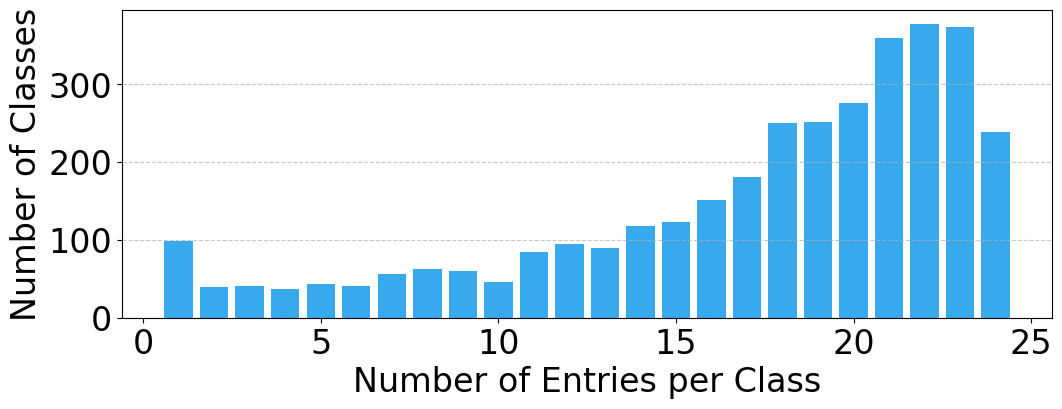

In [11]:
# Count unique ID_Sets
unique_id_sets = len(id_set_entries)
print(f"\nNumber of unique set IDs: {unique_id_sets}")

# Calculate cardinality (number of entries per ID_Set)
cardinality_counts = defaultdict(int)
for id_set, entries in id_set_entries.items():
    cardinality = len(entries)
    cardinality_counts[cardinality] += 1
        
# Set font size
font_size = 24

# Create a histogram for set ID cardinalities
plt.figure(figsize=(12, 4))
cardinalities = list(cardinality_counts.keys())
counts = list(cardinality_counts.values())
plt.bar(cardinalities, counts, color='#37A9EC')
plt.xlabel('Number of Entries per Class', fontsize=font_size)
plt.ylabel('Number of Classes', fontsize=font_size)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=font_size)
plt.savefig('benchmark_arena_set_id_cardinality_histogram.pdf', format='pdf', bbox_inches='tight', transparent=True)


Response length statistics (word count):

GPT-4.1-nano responses:
  Count: 60000
  Mean: 290.46
  Median: 237.50
  Min: 1
  Max: 16250
  Standard deviation: 472.60

GPT-4o-mini responses:
  Count: 60000
  Mean: 283.55
  Median: 228.00
  Min: 1
  Max: 32525
  Standard deviation: 497.49


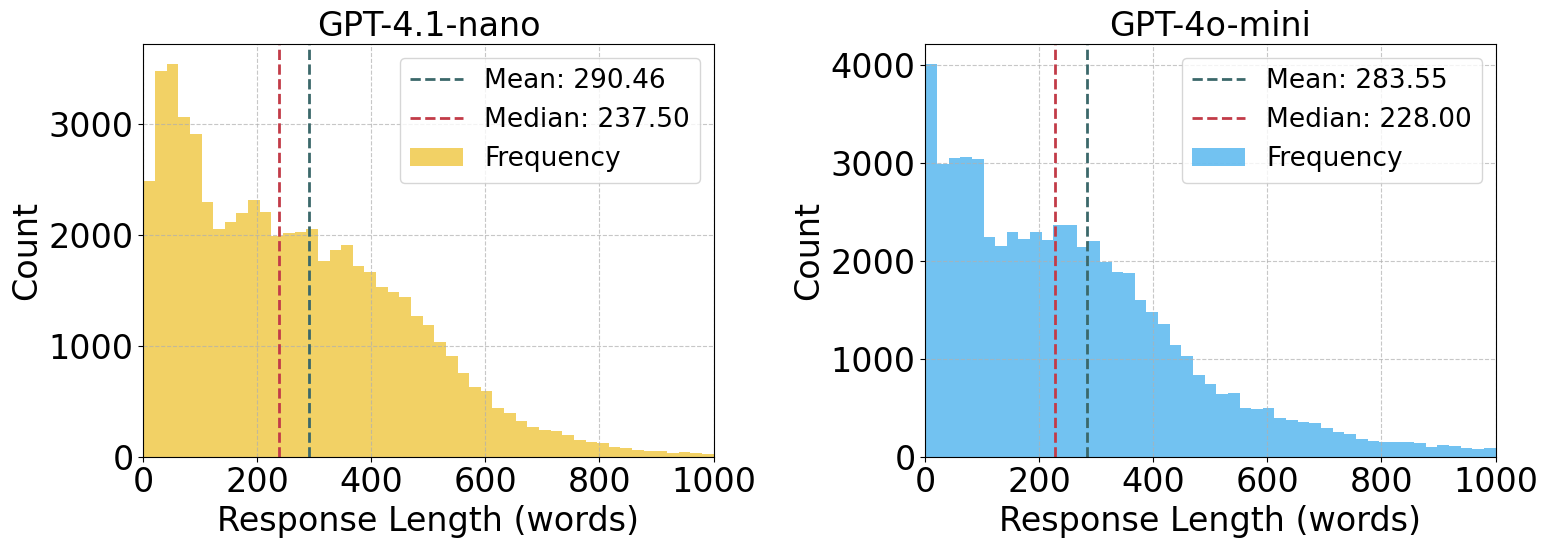

In [10]:
# Response length statistics
print("\nResponse length statistics (word count):")

print("\nGPT-4.1-nano responses:")
if nano_lengths:
    print(f"  Count: {len(nano_lengths)}")
    print(f"  Mean: {np.mean(nano_lengths):.2f}")
    print(f"  Median: {np.median(nano_lengths):.2f}")
    print(f"  Min: {min(nano_lengths)}")
    print(f"  Max: {max(nano_lengths)}")
    print(f"  Standard deviation: {np.std(nano_lengths):.2f}")
else:
    print("  No responses found")
    
print("\nGPT-4o-mini responses:")
if mini_lengths:
    print(f"  Count: {len(mini_lengths)}")
    print(f"  Mean: {np.mean(mini_lengths):.2f}")
    print(f"  Median: {np.median(mini_lengths):.2f}")
    print(f"  Min: {min(mini_lengths)}")
    print(f"  Max: {max(mini_lengths)}")
    print(f"  Standard deviation: {np.std(mini_lengths):.2f}")
else:
    print("  No responses found")

# Set font size
font_size = 24

# Create histograms for response lengths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Set font sizes for all elements
plt.rcParams.update({'font.size': font_size})

# GPT-4.1-nano histogram
if nano_lengths:
    bins = np.linspace(0, min(max(nano_lengths), 1000), 50)
    ax1.hist(nano_lengths, bins=bins, alpha=0.7, color='#EDBE24')
    ax1.set_xlabel('Response Length (words)', fontsize=font_size)
    ax1.set_ylabel('Count', fontsize=font_size)
    ax1.set_title('GPT-4.1-nano', fontsize=font_size)
    ax1.grid(linestyle='--', alpha=0.7)
    ax1.set_xlim(0, 1000)
    ax1.tick_params(axis='both', which='major', labelsize=font_size)
    
    # Add mean and median lines
    nano_mean = np.mean(nano_lengths)
    nano_median = np.median(nano_lengths)
    ax1.axvline(x=nano_mean, color='#3B686A', linestyle='--', linewidth=2)
    ax1.axvline(x=nano_median, color='#C23B48', linestyle='--', linewidth=2)
    
    # Add legend
    ax1.legend(['Mean: {:.2f}'.format(nano_mean), 
                'Median: {:.2f}'.format(nano_median),
                'Frequency'], 
               loc='upper right', fontsize=font_size-5)
else:
    ax1.text(0.5, 0.5, 'No data available', ha='center', va='center', fontsize=font_size)

# GPT-4o-mini histogram
if mini_lengths:
    bins = np.linspace(0, min(max(mini_lengths), 1000), 50)
    ax2.hist(mini_lengths, bins=bins, alpha=0.7, color='#37A9EC')
    ax2.set_xlabel('Response Length (words)', fontsize=font_size)
    ax2.set_ylabel('Count', fontsize=font_size)
    ax2.set_title('GPT-4o-mini', fontsize=font_size)
    ax2.grid(linestyle='--', alpha=0.7)
    ax2.set_xlim(0, 1000)
    ax2.tick_params(axis='both', which='major', labelsize=font_size)
    
    # Add mean and median lines
    mini_mean = np.mean(mini_lengths)
    mini_median = np.median(mini_lengths)
    ax2.axvline(x=mini_mean, color='#3B686A', linestyle='--', linewidth=2)
    ax2.axvline(x=mini_median, color='#C23B48', linestyle='--', linewidth=2)
    
    # Add legend
    ax2.legend(['Mean: {:.2f}'.format(mini_mean), 
                'Median: {:.2f}'.format(mini_median),
                'Frequency'], 
               loc='upper right', fontsize=font_size-5)
else:
    ax2.text(0.5, 0.5, 'No data available', ha='center', va='center', fontsize=font_size)

plt.tight_layout()
plt.savefig('benchmark_arena_response_length_distributions.pdf', format='pdf', bbox_inches='tight')
